In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/vuppalaadithyasairam/ultrasound-breast-images-for-breast-cancer?select=ultrasound+breast+classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: deshnandini
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vuppalaadithyasairam/ultrasound-breast-images-for-breast-cancer


100%|██████████| 564M/564M [00:08<00:00, 71.4MB/s]


In [21]:
import tensorflow as tf

def rgb_to_hsv(image):
    return tf.image.rgb_to_hsv(image)


def dataloading(img_size=(124,124),batch_size=32):
  datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

  train = datagen.flow_from_directory(
      r"/content/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/train",
      target_size=img_size,
      batch_size = batch_size,
      class_mode = 'binary',
      color_mode = 'grayscale'
  )
  val = datagen.flow_from_directory(
      r"/content/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val",
      target_size=img_size,
      batch_size = batch_size,
      class_mode = 'binary',
      color_mode = 'grayscale'
  )
  return train,val

In [22]:
train ,val = dataloading()
print(8116/900)

Found 8116 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
9.017777777777777


In [5]:
image, label = next(train)

print("Pixel values of the 10th image:\n", image.shape)
print("Label shape of the 10th image:", label.shape)


Pixel values of the 10th image:
 (32, 124, 124, 1)
Label shape of the 10th image: (32,)


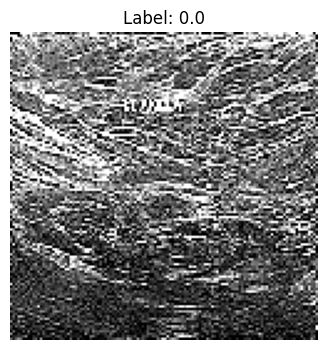

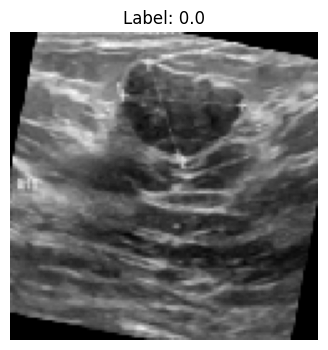

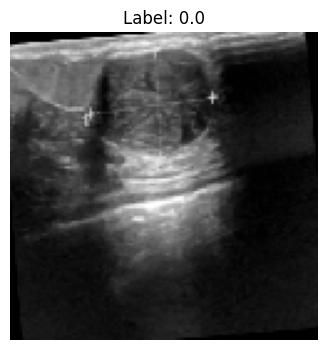

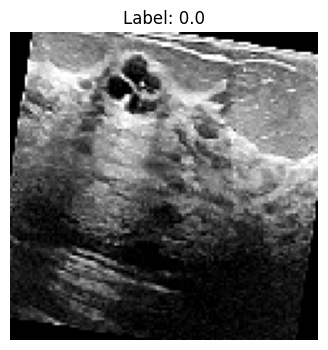

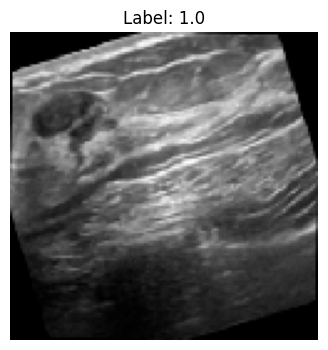

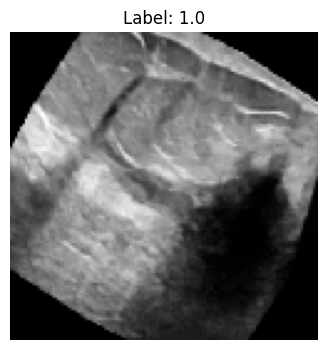

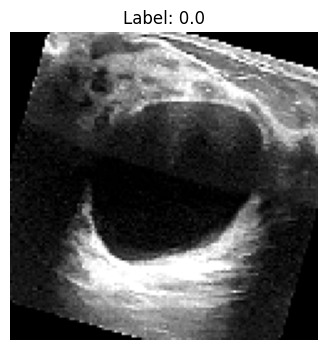

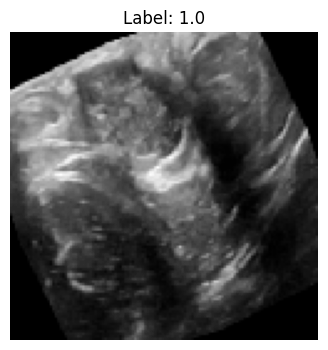

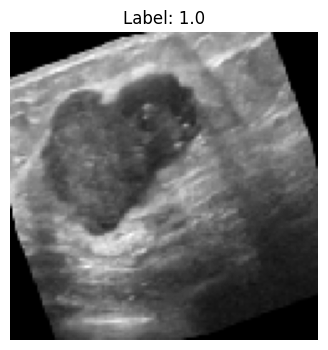

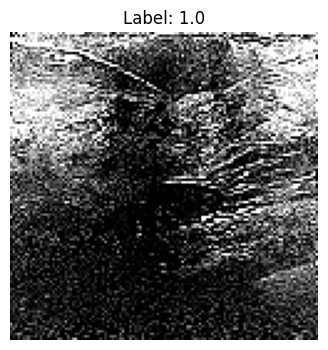

In [6]:
import matplotlib.pyplot as plt

# # Loop through the first 20 images in the training set
for i, (images, labels) in enumerate(train):
    if i >= 10:  # Stop after displaying 20 images
        break
    # Plot each image
    plt.figure(figsize=(4, 4))
    plt.imshow(images[0], cmap='gray')  # Display the first image from the batch
    plt.title(f"Label: {labels[0]}")  # Display the label of the first image
    plt.axis('off')  # Hide axes
    plt.show()


In [7]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255,
        rotation_range=45, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        horizontal_flip=True, # horizontal flip
        brightness_range=[1.0,1.5]
        ) # brightness

In [8]:

val_generator = datagen.flow_from_directory(
                  r"/content/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val",

                  target_size=(124, 124),
                  color_mode="grayscale",
                  batch_size=16,
                  class_mode="binary",

                  )

Found 900 images belonging to 2 classes.


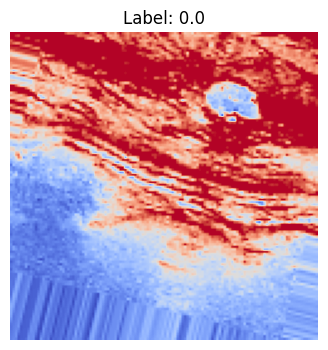

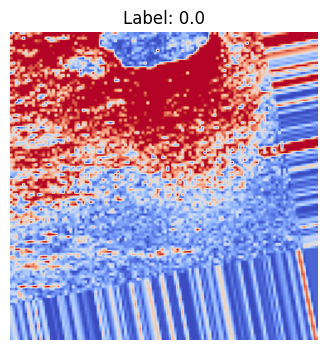

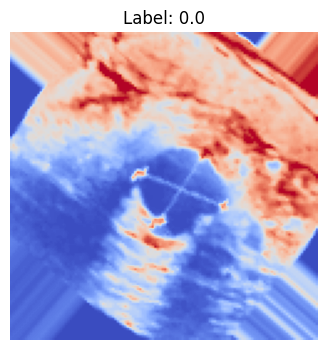

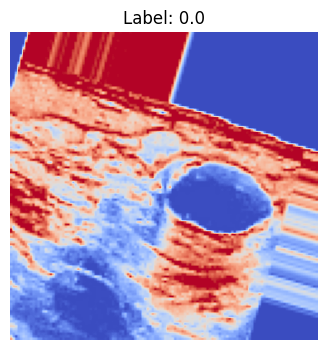

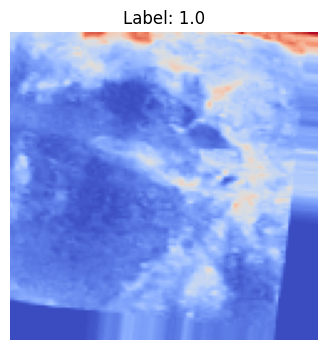

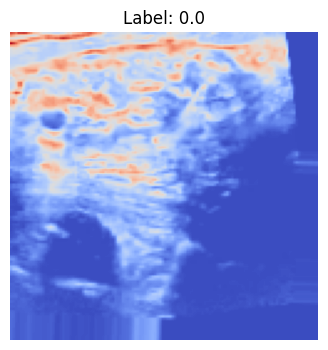

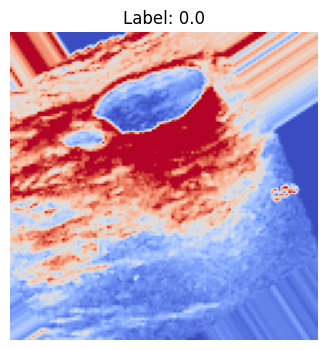

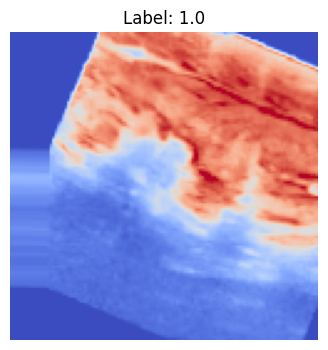

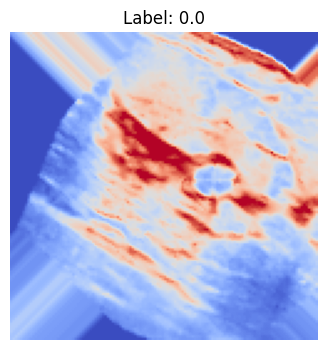

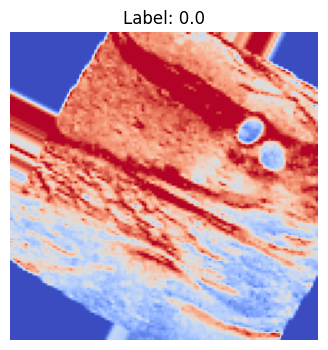

In [9]:
import numpy as np
import matplotlib.pyplot as plt



# import matplotlib.pyplot as plt

# Loop through the first 20 images in the training set
for i, (images, labels) in enumerate(val_generator):
    if i >= 10:  # Stop after displaying 20 images
        break
    # Plot each image
    plt.figure(figsize=(4, 4))
    plt.imshow(images[0], cmap='coolwarm')  # Display the first image from the batch
    plt.title(f"Label: {labels[0]}")  # Display the label of the first image
    plt.axis('off')  # Hide axes
    plt.show()


In [10]:
import itertools

def combined_generator(generator1, generator2):
    while True:
        batch1 = next(generator1)
        batch2 = next(generator2)
        images = tf.concat([batch1[0], batch2[0]], axis=0)
        labels = tf.concat([batch1[1], batch2[1]], axis=0)
        yield images, labels

combined_val = combined_generator(val, val_generator)


In [11]:
# total_images = 0
# for images, labels in combined_val:
#     total_images += images.shape[0]

#     if total_images >= len(val.filepaths) + len(val_generator.filepaths):
#         break

# print("Total number of images in combined_val:", total_images)


In [12]:
# Fetch a batch from the combined generator
images, labels = next(combined_val)

# Check the shape of the first image and label in this batch
print("Shape of images in batch:", images.shape)
print("Shape of labels in batch:", labels.shape)

# To access the 10th image and label in this batch
print("Pixel values of the 10th image:\n", images[9].shape)
print("Label of the 10th image:", labels[9])


Shape of images in batch: (32, 124, 124, 1)
Shape of labels in batch: (32,)
Pixel values of the 10th image:
 (124, 124, 1)
Label of the 10th image: tf.Tensor(1.0, shape=(), dtype=float32)


In [13]:
train

In [14]:
# for i, (images, labels) in enumerate(combined_val):
#     if i >= 20:  # Stop after displaying 20 images
#         break
#     # Plot each image
#     plt.figure(figsize=(4, 4))
#     plt.imshow(images[0], cmap='gray')  # Display the first image from the batch
#     plt.title(f"Label: {labels[0]}")  # Display the label of the first image
#     plt.axis('off')  # Hide axes
#     plt.show()

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,GlobalAvgPool2D,BatchNormalization,MaxPooling2D,Dropout,Flatten,AvgPool2D,GlobalAveragePooling2D
from keras import optimizers
import tensorflow as tf

input_shape = (124,124,1)
def build_model(hp):

      model = Sequential()
      model.add(tf.keras.layers.Input(shape=input_shape))
      model.add(Conv2D(
          filters = hp.Int('filter_1',min_value = 32,max_value = 64,step = 16),
        kernel_size = hp.Choice('kernel_1',values = [3,5,7]), activation = 'relu',
          ))
      model.add(MaxPooling2D())
      model.add(Conv2D(
          filters = hp.Int('filter_2',min_value = 32,max_value = 64,step = 16),
        kernel_size = hp.Choice('kernel_2',values = [3,5]),

        activation = 'relu',
        ))

      model.add(tf.keras.layers.MaxPooling2D(
        pool_size=(hp.Choice('pool_height_2', values=[2, 3]), hp.Choice('pool_width_2', values=[2, 3])),
            strides=(hp.Choice('stride_height_2', values=[1, 2]), hp.Choice('stride_width_2', values=[1, 2])),
        padding='valid',
        ))
      model.add(Conv2D(
          filters = hp.Int('filter_3',min_value = 32,max_value = 64,step = 16),
        kernel_size = hp.Choice('kernel_3',values = [3,5]),

        activation = 'relu',
        ))

      model.add(tf.keras.layers.MaxPooling2D(
        pool_size=(hp.Choice('pool_height_3', values=[2, 3]), hp.Choice('pool_width_3', values=[2, 3])),
            strides=(hp.Choice('stride_height_3', values=[1, 2]), hp.Choice('stride_width_3', values=[1, 2])),
        padding='valid',
        ))
      #Flatten number of features
      model.add(Flatten())

      for i in range(1,3):
        model.add(Dense(units=hp.Int('units_'+str(i),min_value=16,max_value = 64,step = 16),activation = 'relu'))

      model.add(Dropout(0.2))

      model.add(Dense(1,activation = 'sigmoid'))

      model.compile(optimizer = optimizers.Adam(hp.Choice('learning_rate',values = [1e-4, 1e-3, 1e-2,1e-1])),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy','precision','recall'])


      return model



In [30]:
# !pip install keras_tuner


In [34]:
from keras_tuner.tuners import BayesianOptimization

tuner = BayesianOptimization(
    build_model,
    objective = 'val_accuracy',
    max_trials = 2,
    executions_per_trial = 1,
    directory='bayesian',
    project_name='breast_cancer_model',
)

Reloading Tuner from bayesian/breast_cancer_model/tuner0.json


In [35]:
from tensorflow.keras.callbacks import  EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [36]:
tuner.search(train, validation_data=(val), epochs=4,callbacks = [early_stopping])


Trial 2 Complete [00h 01m 40s]
val_accuracy: 0.9344444274902344

Best val_accuracy So Far: 0.9344444274902344
Total elapsed time: 00h 04m 41s


In [37]:
model = tuner.get_best_models()[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [86]:
model.summary()

hyper = tuner.get_best_hyperparameters()[0]
print(hyper.values)

# Architecture is pretty good
# Features for last layer is considerable and doesn't overfit

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 120, 120, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 56, 56, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 50, 51, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 81600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       2,611,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │           1,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,945,733 (30.31 MB)

 Trainable params: 2,648,577 (10.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,297,156 (20.21 MB)

{'filter_1': 32, 'kernel_1': 5, 'filter_2': 32, 'kernel_2': 5, 'pool_height_2': 3, 'pool_width_2': 3, 'stride_height_2': 1, 'stride_width_2': 1, 'filter_3': 32, 'kernel_3': 3, 'pool_height_3': 3, 'pool_width_3': 2, 'stride_height_3': 1, 'stride_width_3': 1, 'units_1': 32, 'units_2': 48, 'learning_rate': 0.001}


In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint

check = ModelCheckpoint(
    filepath='breast_cancer.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=2
)

In [41]:
history = model.fit(train,epochs=5,validation_data=val,validation_split=0.2,callbacks=[check])


Epoch 1/5
253/254 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9788 - loss: 0.0593 - precision: 0.9778 - recall: 0.9797
Epoch 1: val_loss improved from inf to 0.52413, saving model to breast_cancer.keras
254/254 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.9788 - loss: 0.0592 - precision: 0.9778 - recall: 0.9797 - val_accuracy: 0.9333 - val_loss: 0.5241 - val_precision: 0.9009 - val_recall: 0.9550
Epoch 2/5
253/254 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9834 - loss: 0.0466 - precision: 0.9832 - recall: 0.9831
Epoch 2: val_loss did not improve from 0.52413
254/254 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.9834 - loss: 0.0467 - precision: 0.9832 - recall: 0.9831 - val_accuracy: 0.9067 - val_loss: 0.7399 - val_precision: 0.8305 - val_recall: 0.9925
Epoch 3/5
253/254 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9883 - loss: 0.0333 - precision: 0.9875 - recall: 0.9890
Epoch 3: val_loss improved from 0.52413 to 0.45599, saving model to breast_cancer.keras
254/254 ━━

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
[3.4548798e-12]


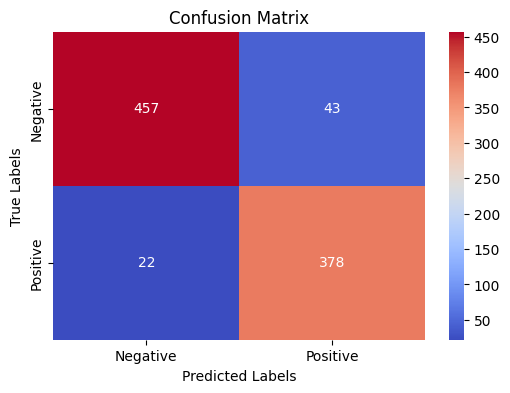

F1 Score: 0.92082826
Accuracy: 0.92777778


In [45]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

model = load_model(r"/content/breast_cancer.keras")
val_data = []
val_labels = []

for i in range(len(val)):
  data,label = val[i]
  val_data.extend(data)
  val_labels.extend(label)

val_data = np.array(val_data)
val_labels = np.array(val_labels)

predictions = model.predict(val_data, batch_size=32)
pred_labels = (predictions > 0.5).astype(int).flatten()

print(predictions[0])

cm= confusion_matrix(val_labels,pred_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


f1 = f1_score(val_labels,pred_labels)
print(f"F1 Score: {f1:.8f}")

accuracy = accuracy_score(val_labels, pred_labels)
print(f"Accuracy: {accuracy:.8f}")



In [65]:
print(model.input_shape)


(None, 124, 124, 1)


In [54]:
image1 = "/content/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (1)-rotated1-rotated2.png"

In [75]:
import cv2
import numpy as np

#image processing is important as our model is trained on that basis

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")

    image = cv2.resize(image, (124, 124))

    image = np.array(image, dtype=np.float32) / 255.0

    image = np.expand_dims(image, axis=0)

    return image


In [77]:
image_pred = preprocess_image(image1)
image_pred = np.expand_dims(image_pred,axis=-1)
print(image_pred.shape)

pred_ict = model.predict(image_pred)

(1, 124, 124, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [79]:
print(pred_ict)

#probability that the given image is malignant(cause death)

[[0.0105547]]


In [84]:
confidence = pred_ict[0][0]

print(f"Confidence that the predicted image is not malignant is: {confidence:.4f}")


Confidence that the predicted image is not malignant is: 0.0106


The above image is not malignant so it's confidence is low